# `t0err` efficiency comparison

Onspill: au & aw

Offspill: as

In [113]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [114]:
ana_labels = {
    "SU2020c" : [
        "SU2020c_CRY_onspill-LH_au", 
        "SU2020c_CRY_onspill-LH_aw",
        "SU2020c_CRY_offspill-LH_as",
        "SU2020c_signal_onspill-LH_au",
        "SU2020c_signal_onspill-LH_aw"
    ],
    
    "SU2020d" : [
        "SU2020d_CRY_onspill-LH_au", 
        "SU2020d_CRY_onspill-LH_aw",
        "SU2020d_CRY_offspill-LH_as",
        "SU2020d_signal_onspill-LH_au",
        "SU2020d_signal_onspill-LH_aw"
    ]

}

In [115]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_offspill-LH_as
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_offspill-LH_as/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020d_CRY_ons

In [116]:
print(results.keys())
print(results["SU2020c"].keys())
print(results["SU2020d"].keys())

dict_keys(['SU2020c', 'SU2020d'])
dict_keys(['SU2020c_CRY_onspill-LH_au', 'SU2020c_CRY_onspill-LH_aw', 'SU2020c_CRY_offspill-LH_as', 'SU2020c_signal_onspill-LH_au', 'SU2020c_signal_onspill-LH_aw'])
dict_keys(['SU2020d_CRY_onspill-LH_au', 'SU2020d_CRY_onspill-LH_aw', 'SU2020d_CRY_offspill-LH_as', 'SU2020d_signal_onspill-LH_au', 'SU2020d_signal_onspill-LH_aw'])


## Plot t0err (SU2020c)

['SU2020c_CRY_onspill-LH_au', 'SU2020c_CRY_onspill-LH_aw', 'SU2020c_CRY_offspill-LH_as', 'SU2020c_signal_onspill-LH_au', 'SU2020c_signal_onspill-LH_aw']
Wrote ../../output/images/comp/h10_t0err_au_aw.png


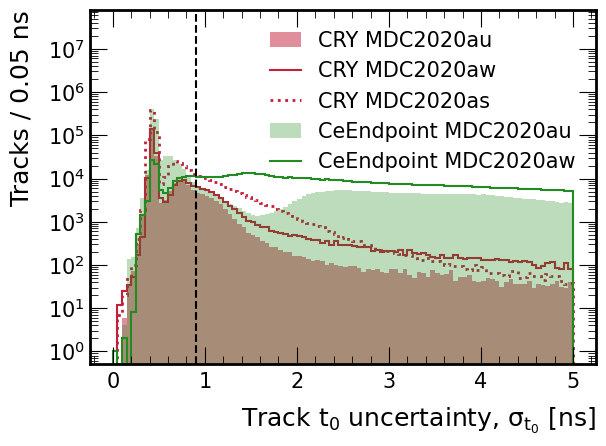

In [117]:
# Get the list of analysis labels for SU2020c
ana_labels_c_list = ana_labels["SU2020c"]

print(ana_labels_c_list)

# Create styles
styles = {
    # ana_labels_c_list[0] : {"color": "#2E74B5"},  # SU2020c_CRY_offspill-LH_as
    ana_labels_c_list[0] : {"color": "#C41E3A", "histtype": "bar", "alpha": 0.5},  # SU2020c_CRY_onspill-LH_au
    ana_labels_c_list[1] : {"color": "#C41E3A"},  # SU2020c_CRY_onspill-LH_aw
    ana_labels_c_list[2] : {"color": "#C41E3A", "linestyle": ":", "linewidth": 2}, # SU2020c_CRY_offspill-LH_as
    ana_labels_c_list[3] : {"color": "#228B22", "histtype": "bar", "alpha": 0.3},  # SU2020c_signal_onspill-LH_au
    ana_labels_c_list[4] : {"color": "#228B22"}  # SU2020c_signal_onspill-LH_aw
}

leg_labels = {
    # ana_labels_c_list[0] : "CRY MDC2020as",
    ana_labels_c_list[0] : "CRY MDC2020au",
    ana_labels_c_list[1] : "CRY MDC2020aw", 
    ana_labels_c_list[2] : "CRY MDC2020as", 
    ana_labels_c_list[3] : "CeEndpoint MDC2020au",
    ana_labels_c_list[4] : "CeEndpoint MDC2020aw"
}

fig, ax = plt.subplots()

# Access the nested results dictionary correctly
for ana_label in ana_labels_c_list:
    # results["SU2020c"][ana_label] accesses the specific analysis results
    hist_obj = results["SU2020c"][ana_label]["hists"]["t0err"] 
    h_sel = hist_obj[{"selection": ["Preselect"]}]
    
    # Plot step histograms
    h_sel.plot1d(
        **styles[ana_label],
        overlay="selection", 
        ax=ax, 
        label=leg_labels[ana_label],
        flow="none"
    )

line_kwargs = {"linestyle": "--", "color": "black", "linewidth": 1.5, "alpha": 1.0}
ax.axvline(0.9, **line_kwargs)
ax.set_yscale("log")
ax.legend(frameon=False) 
ax.set_ylabel("Tracks / 0.05 ns")
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], current_ylim[1] * 100)
plt.tight_layout()
out_path = "../../output/images/comp/h10_t0err_au_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [118]:
# styles = {
#     ana_labels_c[0] : {"color": "#C41E3A"},
#     ana_labels_c[1] : {"color": "#C41E3A", "histtype": "bar", "alpha": 0.5},
#     ana_labels_c[2] : {"color": "#228B22"},
#     ana_labels_c[3] : {"color": "#228B22", "histtype": "bar", "alpha": 0.3},
# }

# leg_labels = {
#     ana_labels_c[0] : "CRY MDC2020au",
#     ana_labels_c[1] : "CRY MDC2020aw",
#     ana_labels_c[2] : "CeEndpoint MDC2020au",
#     ana_labels_c[3] : "CeEndpoint MDC2020aw"
# }

# fig, ax = plt.subplots()

# for ana_label in ana_labels_c:
#     hist_obj = results_c[ana_label]["hists"]["t0err"] 
#     h_sel = hist_obj[{"selection": ["Preselect"]}]
#      # Plot step histograms
#     h_sel.plot1d(
#         **styles[ana_label],
#         overlay="selection", 
#         ax=ax, 
#         label=leg_labels[ana_label],
#         flow="none"
#     )

# line_kwargs = {"linestyle": "--", "color": "black", "linewidth": 1.5, "alpha": 1.0}
# ax.axvline(0.9, **line_kwargs)
# ax.set_yscale("log")
# ax.legend(frameon=False) 
# ax.set_ylabel("Tracks / 0.05 ns")
# current_ylim = ax.get_ylim()
# ax.set_ylim(current_ylim[0], current_ylim[1] * 10)
# plt.tight_layout()
# out_path = "../../output/images/comp/h10_t0err_au_aw.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()

## Compare efficiency

In [119]:
plotter = Plot()
# help(plotter.plot_graph_overlay)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [120]:
leg_labels = {
    ana_labels["SU2020c"][0] : "CRY MDC2020au",
    ana_labels["SU2020c"][1] : "CRY MDC2020aw",
    ana_labels["SU2020c"][2] : "CRY MDC2020as",
    ana_labels["SU2020c"][3] : "CeEndpoint MDC2020au",
    ana_labels["SU2020c"][4] : "CeEndpoint MDC2020aw",
    ana_labels["SU2020d"][0] : "CRY MDC2020au",
    ana_labels["SU2020d"][1] : "CRY MDC2020aw",
    ana_labels["SU2020d"][2] : "CRY MDC2020as",
    ana_labels["SU2020d"][3] : "CeEndpoint MDC2020au",
    ana_labels["SU2020d"][4] : "CeEndpoint MDC2020aw"

}


In [121]:
leg_labels

{'SU2020c_CRY_onspill-LH_au': 'CRY MDC2020au',
 'SU2020c_CRY_onspill-LH_aw': 'CRY MDC2020aw',
 'SU2020c_CRY_offspill-LH_as': 'CRY MDC2020as',
 'SU2020c_signal_onspill-LH_au': 'CeEndpoint MDC2020au',
 'SU2020c_signal_onspill-LH_aw': 'CeEndpoint MDC2020aw',
 'SU2020d_CRY_onspill-LH_au': 'CRY MDC2020au',
 'SU2020d_CRY_onspill-LH_aw': 'CRY MDC2020aw',
 'SU2020d_CRY_offspill-LH_as': 'CRY MDC2020as',
 'SU2020d_signal_onspill-LH_au': 'CeEndpoint MDC2020au',
 'SU2020d_signal_onspill-LH_aw': 'CeEndpoint MDC2020aw'}

In [122]:
def get_eff(results):
    """
    Extract efficiency data from the nested results dictionary.
    Returns nested dictionaries with the same structure as results.
    """
    sig_eff_dict, veto_eff_dict = {}, {}
    
    # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
    for key in results.keys():
        sig_eff_dict[key] = {}
        veto_eff_dict[key] = {}
        
        # Iterate through analysis labels for this key
        for ana_label in results[key].keys():
            analysis = results[key][ana_label]["analysis"]
        
            if "signal" in ana_label:
                print(f"Processing signal: {ana_label}")
                sig_eff          = float(analysis.at[2, "CE-like (wide)"])
                sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
                sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
                sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                
                sig_eff_dict[key][ana_label] = {
                    "sig_eff": sig_eff,
                    "sig_eff_err": sig_eff_err
                }
                
            elif "CRY" in ana_label:     
                print(f"Processing CRY: {ana_label}")
                veto_eff         = float(analysis.at[2, "No veto (wide)"])
                veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
                veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
                veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
        
                veto_eff_dict[key][ana_label] = {
                    "veto_eff": veto_eff,
                    "veto_eff_err": veto_eff_err
                }
    
    return sig_eff_dict, veto_eff_dict

sig_eff_dict, veto_eff_dict = get_eff(results)

# Now you can access data with the same structure as results:
# sig_eff_dict["SU2020c"]["SU2020c_signal_onspill-LH_au"]["sig_eff"]
# veto_eff_dict["SU2020d"]["SU2020d_CRY_onspill-LH_au"]["veto_eff"]

# If you want to access just the c or d data:
sig_eff_c = sig_eff_dict["SU2020c"]
veto_eff_c = veto_eff_dict["SU2020c"]
sig_eff_d = sig_eff_dict["SU2020d"] 
veto_eff_d = veto_eff_dict["SU2020d"]

# Example: Print all signal efficiencies
print("\nSignal Efficiencies:")
for key in sig_eff_dict:
    print(f"\n{key}:")
    for ana_label in sig_eff_dict[key]:
        eff = sig_eff_dict[key][ana_label]["sig_eff"]
        print(f"  {ana_label}: {eff:.4f}")

# Example: Print all veto efficiencies  
print("\nVeto Efficiencies:")
for key in veto_eff_dict:
    print(f"\n{key}:")
    for ana_label in veto_eff_dict[key]:
        eff = veto_eff_dict[key][ana_label]["veto_eff"]
        print(f"  {ana_label}: {eff:.4f}")

Processing CRY: SU2020c_CRY_onspill-LH_au
Processing CRY: SU2020c_CRY_onspill-LH_aw
Processing CRY: SU2020c_CRY_offspill-LH_as
Processing signal: SU2020c_signal_onspill-LH_au
Processing signal: SU2020c_signal_onspill-LH_aw
Processing CRY: SU2020d_CRY_onspill-LH_au
Processing CRY: SU2020d_CRY_onspill-LH_aw
Processing CRY: SU2020d_CRY_offspill-LH_as
Processing signal: SU2020d_signal_onspill-LH_au
Processing signal: SU2020d_signal_onspill-LH_aw

Signal Efficiencies:

SU2020c:
  SU2020c_signal_onspill-LH_au: 12.1887
  SU2020c_signal_onspill-LH_aw: 0.7424

SU2020d:
  SU2020d_signal_onspill-LH_au: 21.7595
  SU2020d_signal_onspill-LH_aw: 21.7386

Veto Efficiencies:

SU2020c:
  SU2020c_CRY_onspill-LH_au: 99.9601
  SU2020c_CRY_onspill-LH_aw: 99.9400
  SU2020c_CRY_offspill-LH_as: 99.9560

SU2020d:
  SU2020d_CRY_onspill-LH_au: 99.9569
  SU2020d_CRY_onspill-LH_aw: 99.9616
  SU2020d_CRY_offspill-LH_as: 99.9448


In [123]:
# def get_eff(results, key, ana_labels_list):
#     """
#     Extract efficiency data from the nested results dictionary.
#     """
#     sig_eff_dict, veto_eff_dict = {}, {}
    
#     for ana_label in ana_labels_list:
#         # Access the nested structure: results[key][ana_label]
#         analysis = results[key][ana_label]["analysis"]
    
#         if "signal" in ana_label:
#             print(ana_label)
#             sig_eff          = float(analysis.at[2, "CE-like (wide)"])
#             sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
#             sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
#             sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
            
#             sig_eff_dict[leg_labels[ana_label]] = {
#                 "sig_eff": sig_eff,
#                 "sig_eff_err": sig_eff_err
#             }
            
#         elif "CRY" in ana_label:     
#             print(ana_label)
#             veto_eff         = float(analysis.at[2, "No veto (wide)"])
#             veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
#             veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
#             veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
    
#             veto_eff_dict[leg_labels[ana_label]] = {
#                 "veto_eff": veto_eff,
#                 "veto_eff_err": veto_eff_err
#             }
    
#     return sig_eff_dict, veto_eff_dict

# # Usage with the new structure:
# # Get the analysis label lists
# ana_labels_c_list = ana_labels["SU2020c"]
# ana_labels_d_list = ana_labels["SU2020d"]

# # Call the function with the correct parameters
# sig_eff_dict_c, veto_eff_dict_c = get_eff(results, "SU2020c", ana_labels_c_list)
# sig_eff_dict_d, veto_eff_dict_d = get_eff(results, "SU2020d", ana_labels_d_list)


In [124]:

# def get_eff(results, ana_labels):

#     sig_eff_dict, veto_eff_dict = {}, {}
#     for ana_label in ana_labels:
#         analysis = results[ana_label]["analysis"]
    
#         if "signal" in ana_label:
#             print(ana_label)
#             sig_eff          = float(analysis.at[2, "CE-like (wide)"])
#             sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
#             sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
#             sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
            
#             sig_eff_dict[leg_labels[ana_label]] = {
#                 "sig_eff": sig_eff,
#                 "sig_eff_err": sig_eff_err
#             }
            
#         elif "CRY" in ana_label:     
#             print(ana_label)
#             veto_eff         = float(analysis.at[2, "No veto (wide)"])
#             veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
#             veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
#             veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
    
#             veto_eff_dict[leg_labels[ana_label]] = {
#                 "veto_eff": veto_eff,
#                 "veto_eff_err": veto_eff_err
#             }

#     return sig_eff_dict, veto_eff_dict

# sig_eff_dict_c, veto_eff_dict_c = get_eff(results_c, ana_labels_c)
# sig_eff_dict_d, veto_eff_dict_d = get_eff(results_d, ana_labels_d)

In [125]:
veto_eff_dict_c

{'CRY MDC2020au': {'veto_eff': 99.96009349523972,
  'veto_eff_err': array([0.01819442, 0.01249836])},
 'CRY MDC2020aw': {'veto_eff': 99.93997599039616,
  'veto_eff_err': array([0.04604273, 0.02606274])}}

In [126]:
veto_eff_dict_d

{'CRY MDC2020au': {'veto_eff': 99.95693367786392,
  'veto_eff_err': array([0.01593583, 0.01163309])},
 'CRY MDC2020aw': {'veto_eff': 99.96163028649386,
  'veto_eff_err': array([0.01509328, 0.01083343])}}

In [127]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict_c.keys())
# sig_effs_c = [data["sig_eff"] for data in sig_eff_dict_c.values()]
# sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_c.values()],
#                       [data["sig_eff_err"][1] for data in sig_eff_dict_c.values()]])
# sig_effs_d = [data["sig_eff"] for data in sig_eff_dict_d.values()]
# sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_d.values()],
#                       [data["sig_eff_err"][1] for data in sig_eff_dict_d.values()]])

# # Create offset positions for side-by-side bars
# x = np.arange(len(labels))
# width = 0.35

# ax1.bar(x - width/2, sig_effs_c, width, yerr=sig_errs_c, capsize=3, 
#         fill=False, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
# ax1.bar(x + width/2, sig_effs_d, width, yerr=sig_errs_d, capsize=3, 
#         fill=False, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
# ax1.set_xticks(x)
# ax1.set_ylim(0, 27.5)
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')
# ax1.legend()

# # Veto efficiency - FIXED: using correct data sources
# labels = list(veto_eff_dict_c.keys())
# veto_effs_c = [data["veto_eff"] for data in veto_eff_dict_c.values()]  # Fixed: was using _d
# veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_c.values()],  # Fixed: was using _d
#                        [data["veto_eff_err"][1] for data in veto_eff_dict_c.values()]])  # Fixed: was using _d
# veto_effs_d = [data["veto_eff"] for data in veto_eff_dict_d.values()]
# veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_d.values()],
#                        [data["veto_eff_err"][1] for data in veto_eff_dict_d.values()]])

# x = np.arange(len(labels))
# ax2.bar(x - width/2, veto_effs_c, width, yerr=veto_errs_c, capsize=3, 
#         fill=False, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
# ax2.bar(x + width/2, veto_effs_d, width, yerr=veto_errs_d, capsize=3, 
#         fill=False, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(x)
# ax2.set_xticklabels(labels, rotation=45)
# # ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')
# ax2.legend()

# plt.tight_layout()
# out_path = "../../output/images/comp/bo_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()  # Add this if you want to display the plot

Wrote ../../output/images/comp/bo_eff_comp.png


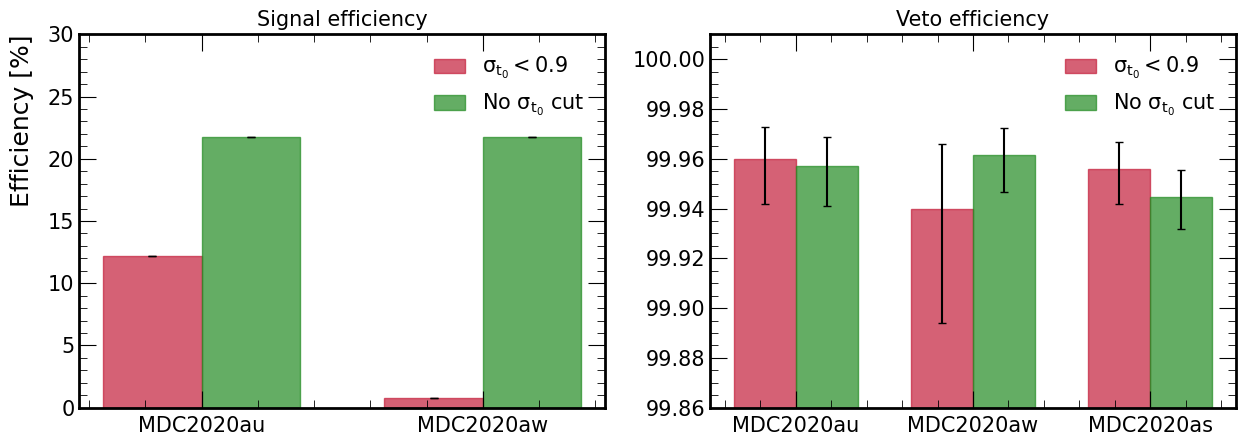

In [131]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency
labels = ["MDC2020au", "MDC2020aw"] # list(sig_eff_dict["SU2020c"].keys())
sig_effs_c = [data["sig_eff"] for data in sig_eff_dict["SU2020c"].values()]
sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict["SU2020c"].values()],
                      [data["sig_eff_err"][1] for data in sig_eff_dict["SU2020c"].values()]])
sig_effs_d = [data["sig_eff"] for data in sig_eff_dict["SU2020d"].values()]
sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict["SU2020d"].values()],
                      [data["sig_eff_err"][1] for data in sig_eff_dict["SU2020d"].values()]])

# Create offset positions for side-by-side bars
x = np.arange(len(labels))
width = 0.35

ax1.bar(x - width/2, sig_effs_c, width, yerr=sig_errs_c, capsize=3, 
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
ax1.bar(x + width/2, sig_effs_d, width, yerr=sig_errs_d, capsize=3, 
        color="#228B22", alpha=0.7, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
ax1.set_xticks(x)
ax1.set_ylim(0, 30)
ax1.set_xticklabels(labels) #, rotation=45)
ax1.set_ylabel('Efficiency [%]')
ax1.set_title('Signal efficiency')
ax1.legend()

# Veto efficiency
labels = labels = ["MDC2020au", "MDC2020aw", "MDC2020as"] # list(veto_eff_dict["SU2020c"].keys())
veto_effs_c = [data["veto_eff"] for data in veto_eff_dict["SU2020c"].values()]  # Fixed: was using _d
veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict["SU2020c"].values()],  # Fixed: was using _d
                       [data["veto_eff_err"][1] for data in veto_eff_dict["SU2020c"].values()]])  # Fixed: was using _d
veto_effs_d = [data["veto_eff"] for data in veto_eff_dict["SU2020d"].values()]
veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict["SU2020d"].values()],
                       [data["veto_eff_err"][1] for data in veto_eff_dict["SU2020d"].values()]])

x = np.arange(len(labels))
ax2.bar(x - width/2, veto_effs_c, width, yerr=veto_errs_c, capsize=3, 
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
ax2.bar(x + width/2, veto_effs_d, width, yerr=veto_errs_d, capsize=3, 
        color="#228B22", alpha=0.7, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
ax2.set_ylim(99.86, 100.01)
ax2.set_xticks(x)
ax2.set_xticklabels(labels) # , rotation=45)
# ax2.set_ylabel('Efficiency [%]')
ax2.set_title('Veto efficiency')
ax2.legend()

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_comp.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()  # Add this if you want to display the plot

In [129]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict_c.keys())
# sig_effs_c = [data["sig_eff"] for data in sig_eff_dict_c.values()]
# sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_c.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict_c.values()]])
# sig_effs_d = [data["sig_eff"] for data in sig_eff_dict_d.values()]
# sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_d.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict_d.values()]])

# ax1.bar(range(len(labels)), sig_effs_c, yerr=sig_errs_c, capsize=3, fill=False, edgecolor="red", label=r"$\sigma{t{0}} < 0.9$")
# ax1.bar(range(len(labels)), sig_effs_d, yerr=sig_errs_d, capsize=3, fill=False, edgecolor="red", label=r"No $\sigma{t{0}}$ cut")
# ax1.set_xticks(range(len(labels)))
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')

# # Veto efficiency
# labels = list(veto_eff_dict_c.keys())
# veto_effs_c = [data["veto_eff"] for data in veto_eff_dict_c.values()]
# veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_c.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict_c.values()]])

# veto_effs_d = [data["veto_eff"] for data in veto_eff_dict_d.values()]
# veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_d.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict_d.values()]])

# ax2.bar(range(len(labels)), veto_effs_c, yerr=veto_errs_c, capsize=3, fill=False, edgecolor="blue", label=r"$\sigma{t{0}} < 0.9$")
# ax2.bar(range(len(labels)), veto_effs_d, yerr=veto_errs_d, capsize=3, fill=False, edgecolor="blue", label=r"No $\sigma{t{0}}$ cut")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(range(len(labels)))

# ax2.set_xticklabels(labels, rotation=45)
# ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')

# plt.tight_layout()
# out_path="../../output/images/comp/bo_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")


In [14]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict.keys())
# sig_effs = [data["sig_eff"] for data in sig_eff_dict.values()]
# sig_errs = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict.values()]])

# ax1.bar(range(len(labels)), sig_effs, yerr=sig_errs, capsize=3, fill=False, edgecolor="red")
# ax1.set_xticks(range(len(labels)))
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')

# # Veto efficiency
# labels = list(veto_eff_dict.keys())
# veto_effs = [data["veto_eff"] for data in veto_eff_dict.values()]
# veto_errs = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict.values()]])

# ax2.bar(range(len(labels)), veto_effs, yerr=veto_errs, capsize=3, fill=False, edgecolor="blue")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(range(len(labels)))

# ax2.set_xticklabels(labels, rotation=45)
# ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')

# plt.tight_layout()
# out_path="../../output/images/comp/bar_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")


In [15]:
# more_ana_labels = [
#     "SU2020d_CRY_onspill-LH_au", 
#     "SU2020d_CRY_onspill-LH_aw",
#     "SU2020d_signal_onspill-LH_au",
#     "SU2020d_signal_onspill-LH_aw"
# ]

# ana_labels.append(more_ana_labels)

# leg_labels = {
#     ana_labels[4] : "CRY MDC2020au",
#     ana_labels[5] : "CRY MDC2020aw",
#     ana_labels[6] : "CeEndpoint MDC2020au",
#     ana_labels[7] : "CeEndpoint MDC2020aw"
# }

# results = {}
# for ana_label in ana_labels:
#     loader = Load(
#         in_path = f"../../output/results/{ana_label}"
#     )
#     results[ana_label] = loader.load_pkl() 